In [97]:
# !pip install pycaret
# !pip install shap

In [12]:
import pandas as pd
# import numpy as np
# import pycaret
# import matplotlib
from pycaret.classification import *
pd.set_option('display.max_columns', 100)

In [3]:
filename = "data.csv"
df = pd.read_csv(filename)
label_mapping = {'Yes': 1, 'No': 0}
# 'Label'列をマップして変換
purpose = "Attrition"
df[purpose] = df[purpose].map(label_mapping)

exp = setup(data = df, target = purpose)

,Description,Value
0,Session id,6042
1,Target,Attrition
2,Target type,Binary
3,Original data shape,"(1470, 38)"
4,Transformed data shape,"(1470, 41)"
5,Transformed train set shape,"(1028, 41)"
6,Transformed test set shape,"(442, 41)"
7,Ordinal features,2
8,Numeric features,28
9,Categorical features,9


In [15]:
df[:10]

,Age,Attrition,BusinessTravel,DailyAchievement,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyAchievement,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyAchievement,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,HowToEmploy,Incentive,RemoteWork
0,25,0,Travel_Rarely,1280,Research & Development,7,1,Medical,1,143,4,Male,64,2,1,Research Scientist,4,Married,2889,26897,1,Y,No,5,1,3,80,2,2,2,3,2,2,2,1,intern,0,4
1,27,0,Travel_Rarely,1167,Research & Development,4,2,Life Sciences,1,1259,1,Male,76,3,1,Research Scientist,3,Divorced,2517,3208,1,Y,No,5,1,2,80,3,5,2,3,5,3,0,3,intern,0,1
2,25,1,Travel_Rarely,240,Sales,5,3,Marketing,1,142,3,Male,46,2,2,Sales Executive,3,Single,5744,26959,1,Y,Yes,5,1,4,80,0,6,1,3,6,4,0,3,agent_A,0,2
3,28,0,Travel_Rarely,440,Research & Development,21,3,Medical,1,221,3,Male,42,3,1,Research Scientist,4,Married,2713,6672,1,Y,No,5,1,3,80,1,5,2,1,5,2,0,2,New_graduate_recruitment,0,5
4,28,1,Travel_Rarely,529,Research & Development,2,4,Life Sciences,1,364,1,Male,79,3,1,Laboratory Technician,3,Single,3485,14935,2,Y,No,5,1,3,80,0,5,5,1,0,0,0,0,New_graduate_recruitment,0,1
5,27,0,Travel_Rarely,1377,Sales,2,3,Life Sciences,1,437,4,Male,74,3,2,Sales Executive,3,Single,4478,5242,1,Y,Yes,5,1,1,80,0,5,3,3,5,4,0,4,New_graduate_recruitment,0,2
6,21,1,Travel_Frequently,756,Sales,1,1,Technical Degree,1,478,1,Female,99,2,1,Sales Representative,2,Single,2174,9150,1,Y,Yes,5,1,3,80,0,3,3,3,3,2,1,2,direct_recruting,0,1
7,25,0,Travel_Rarely,891,Sales,4,2,Life Sciences,1,527,2,Female,99,2,2,Sales Executive,4,Single,4487,12090,1,Y,Yes,5,1,2,80,0,5,3,3,5,4,1,3,agent_A,0,3
8,26,1,Travel_Frequently,426,Human Resources,17,4,Life Sciences,1,608,2,Female,58,3,1,Human Resources,3,Divorced,2741,22808,0,Y,Yes,5,1,2,80,1,8,2,2,7,7,1,0,agent_A,0,2
9,24,0,Travel_Rarely,691,Research & Development,23,3,Medical,1,639,2,Male,89,4,1,Research Scientist,4,Married,2725,21630,1,Y,Yes,5,1,2,80,2,6,3,3,6,5,1,4,New_graduate_recruitment,0,4


In [4]:
best = compare_models()

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,05:29:38
Status,. . . . . . . . . . . . . . . . . .,Loading Estimator
Estimator,. . . . . . . . . . . . . . . . . .,Logistic Regression


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lda,Linear Discriminant Analysis,0.8784,0.8598,0.4044,0.7361,0.5154,0.4532,0.4830,0.0440
ridge,Ridge Classifier,0.8716,0.0000,0.2412,0.9000,0.3657,0.3227,0.4137,0.0320
lr,Logistic Regression,0.8473,0.7796,0.1868,0.6476,0.2746,0.2183,0.2777,0.8280
et,Extra Trees Classifier,0.8444,0.8269,0.0849,0.5333,0.1431,0.1127,0.1724,0.0890
dummy,Dummy Classifier,0.8385,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0450
knn,K Neighbors Classifier,0.8172,0.5900,0.0908,0.2844,0.1339,0.0644,0.0777,0.3150
qda,Quadratic Discriminant Analysis,0.7977,0.5898,0.2463,0.4114,0.2752,0.1716,0.1933,0.0490
rf,Random Forest Classifier,0.7976,0.7655,0.1051,0.3528,0.1018,0.0469,0.0871,0.1040
xgboost,Extreme Gradient Boosting,0.7839,0.7315,0.1426,0.2464,0.1287,0.0567,0.0753,0.0950
catboost,CatBoost Classifier,0.7829,0.7072,0.1243,0.2159,0.1029,0.0342,0.0537,1.4770


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

In [102]:
best

LinearDiscriminantAnalysis(covariance_estimator=None, n_components=None,
                           priors=None, shrinkage=None, solver='svd',
                           store_covariance=False, tol=0.0001)

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8350,0.5636,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.8350,0.7791,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.8350,0.7346,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.8350,0.6922,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.8350,0.5910,0.0000,0.0000,0.0000,0.0000,0.0000
5,0.8350,0.6772,0.0000,0.0000,0.0000,0.0000,0.0000
6,0.8447,0.6070,0.0000,0.0000,0.0000,0.0000,0.0000
7,0.8447,0.6796,0.0000,0.0000,0.0000,0.0000,0.0000
8,0.8431,0.6613,0.0000,0.0000,0.0000,0.0000,0.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


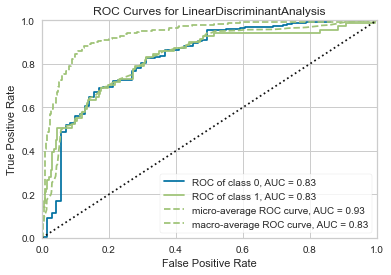

In [103]:
model = create_model(best)
tuned_model = tune_model(model)
plot_model(tuned_model)

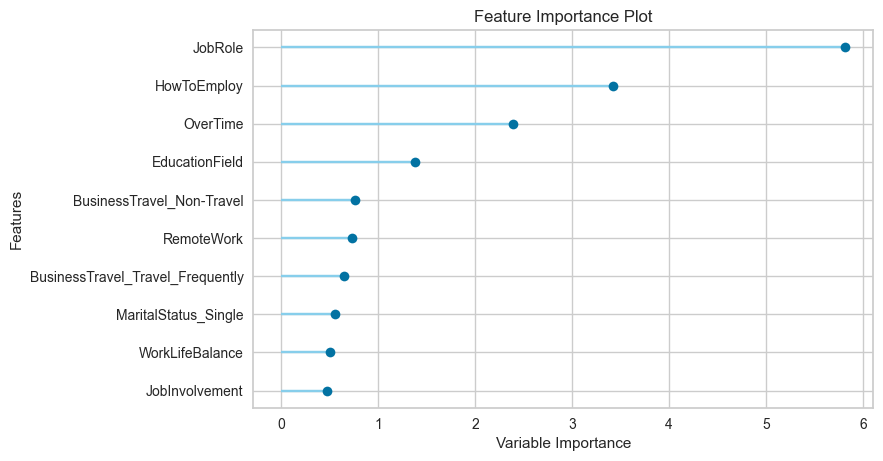

In [104]:
plot_model(tuned_model, plot='feature')